# Twitter Sentiment Analysis - Fake Covid-19 dataset

We've used the following packages:

In [23]:
import plotly.express as px
#from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import json
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from nltk.corpus import stopwords
import itertools
import altair as alt
from dateutil.parser import parse
from IPython.core.display import Image, display
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Then we have defined the following functions to clean the tweets' text:

In [24]:
#def remove_emoticons(text):
#    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
#    return emoticon_pattern.sub(r'', text)

#def remove_emoji(text):
#    emoji_pattern = re.compile("["
#                           u"\U0001F600-\U0001F64F"  # emoticons
#                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                           u"\U00002702-\U000027B0"
#                           u"\U000024C2-\U0001F251"
#                           "]+", flags=re.UNICODE)
#    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

#def give_emoji_free_text(text):
#    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

In order to do the classification of the tweets, we need to read the csv file and the json file:

In [25]:
csv_dataframe = pd.read_csv('fakecovid/dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
data1 = data

## Pie chart

We're interested in the "full_text" field, that it has been cleaned with specific functions.  
We've used **SentimentIntensityAnalyzer** to calculate positive, negative and neutral sentiment scores from the text.

In [27]:
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
positive_scores = []
neutral_scores = []
negative_scores = []
id_positive = []
id_neutral = []
id_negative = []

index=0
stop_words = stopwords.words('english')

for element in data:
    #data[index]['full_text'] = data[index]['full_text'].lower()                 # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])    # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    #data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    #data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    #data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                  # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])   # Remove hashtags
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])   # No mentions
    #data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    #data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^RT ", " ", data[index]['full_text'])    # No RT
    #data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])  # Remove big spaces
    
    tweet_list.append(data[index]['full_text'])
    #analysis = TextBlob(data[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data[index]['full_text'])
    #print(data[index]['full_text'])
    #print(score['compound'])
    #print(" ")
    if score['compound']>0.05:
        positive_list.append(data[index]['full_text'])
        positive_scores.append(score['compound'])
        id_positive.append(data[index]['id_str'])
    elif score['compound']<-0.05:
        negative_list.append(data[index]['full_text'])
        negative_scores.append(score['compound'])
        id_negative.append(data[index]['id_str'])
    else:
        neutral_list.append(data[index]['full_text'])
        neutral_scores.append(score['compound'])
        id_neutral.append(data[index]['id_str'])
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.



We've reported the number of tweets (Positive, Negative, Neutral) in a DataFrame in order to visualise them:

In [28]:
print("Total number of tweets: ",len(tweet_list))
print("Positive number: ",len(positive_list))
print("Negative number: ", len(negative_list))
print("Neutral number: ",len(neutral_list))

category = []
count = []

categorypositive = ["Positive"] * len(positive_list)
categoryneutral = ["Neutral"] * len(neutral_list)
categorynegative = ["Negative"] * len(negative_list)

category = categorypositive + categoryneutral + categorynegative

count = Counter(category)

df_fake1 = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_fake1 = df_fake1.rename(columns={'index':'Category', 0:'Count'})

Total number of tweets:  1454
Positive number:  586
Negative number:  543
Neutral number:  325


Then we have created the pie chart:

In [29]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
fig_fake1 = px.pie(df_fake1, values='Count', names='Category',
             title='Tweets percentage classified by sentiment - Fake Covid-19 dataset')
fig_fake1.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
fig_fake1.show()

## A few examples...

### An example of a tweet with a positive sentiment score

In [30]:
ind = positive_scores.index(max(positive_scores))
print("https://twitter.com/anyuser/status/" + id_positive[ind])

https://twitter.com/anyuser/status/1245941756488634368


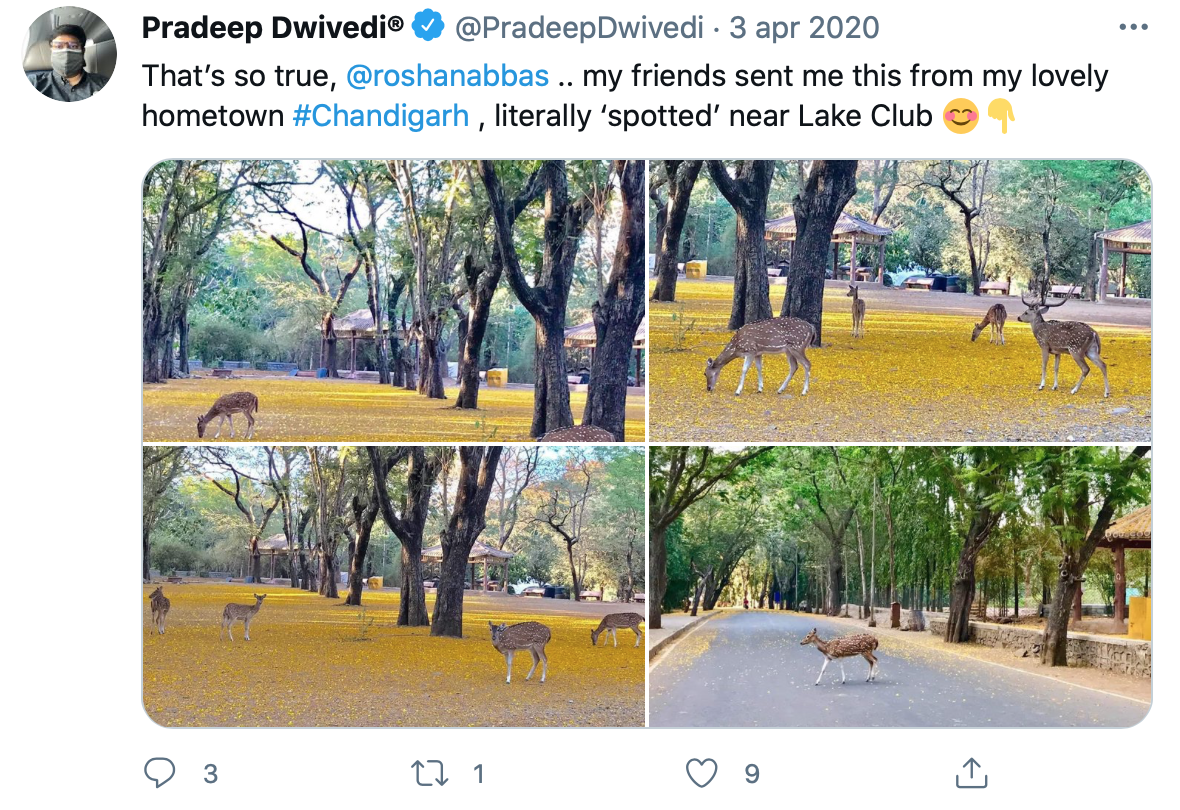

**Why is this tweet fake?** https://newschecker.in/english/pictures-of-deer-strolling-on-road-are-not-from-chandigarh-here-s-the-reality

### An example of a tweet with a negative sentiment score

In [35]:
negative_scores.sort()
print(negative_scores[9])
ind = negative_scores.index(negative_scores[9])
print("https://twitter.com/anyuser/status/" + id_negative[ind])

-0.9287
https://twitter.com/anyuser/status/1265507998761463811


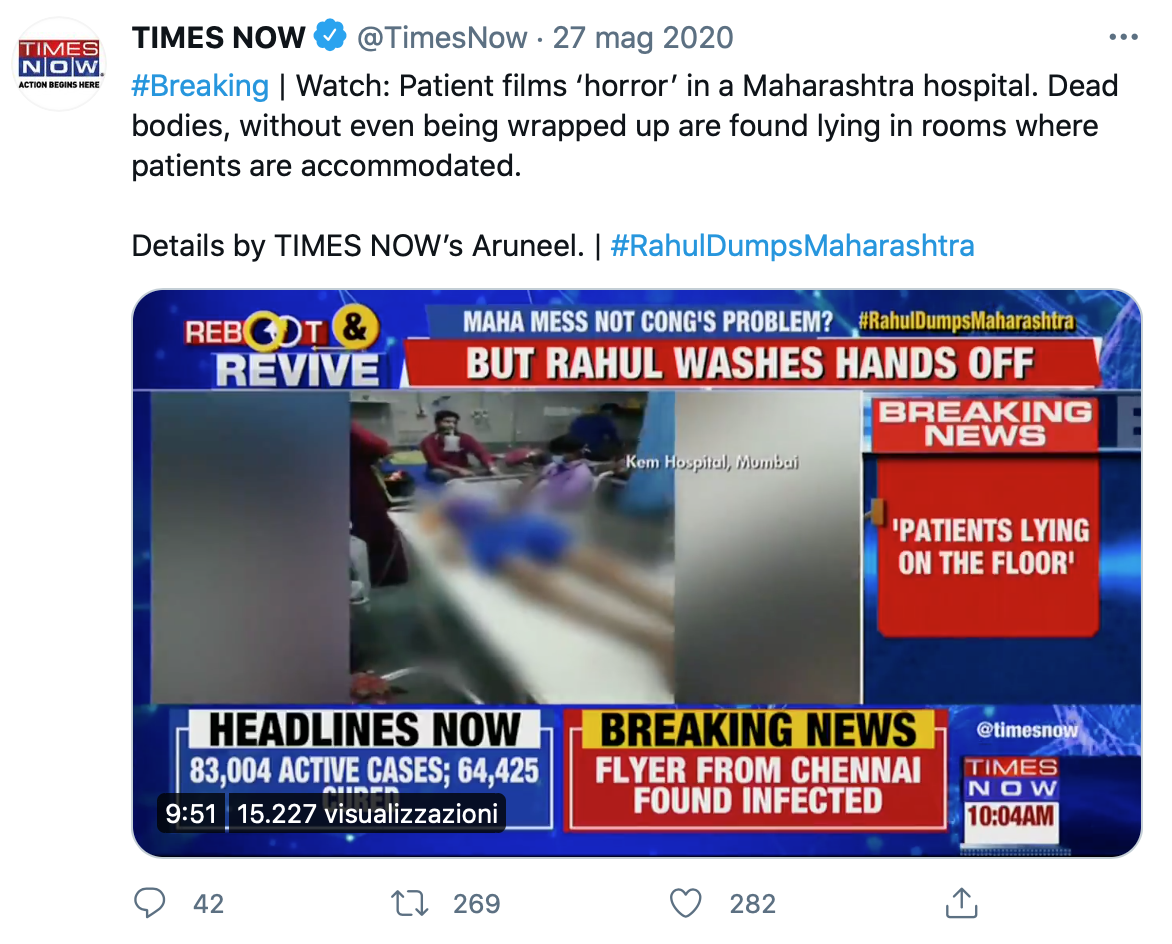

**Why is this tweet fake?** https://factly.in/this-video-shows-the-terrible-situation-at-a-hospital-in-mumbai-kem-hospital-not-delhi/

### An example of a tweet with a neutral sentiment score

In [38]:
neutral_scores.sort()
print("It is considered a neutral tweet but it has slight polarity to negative, its score is "+str(neutral_scores[12]))
ind = neutral_scores.index(neutral_scores[12])
print("https://twitter.com/anyuser/status/" + id_neutral[ind])

It is considered a neutral tweet but it has slight polarity to negative, its score is -0.0083
https://twitter.com/anyuser/status/1269164650056183808


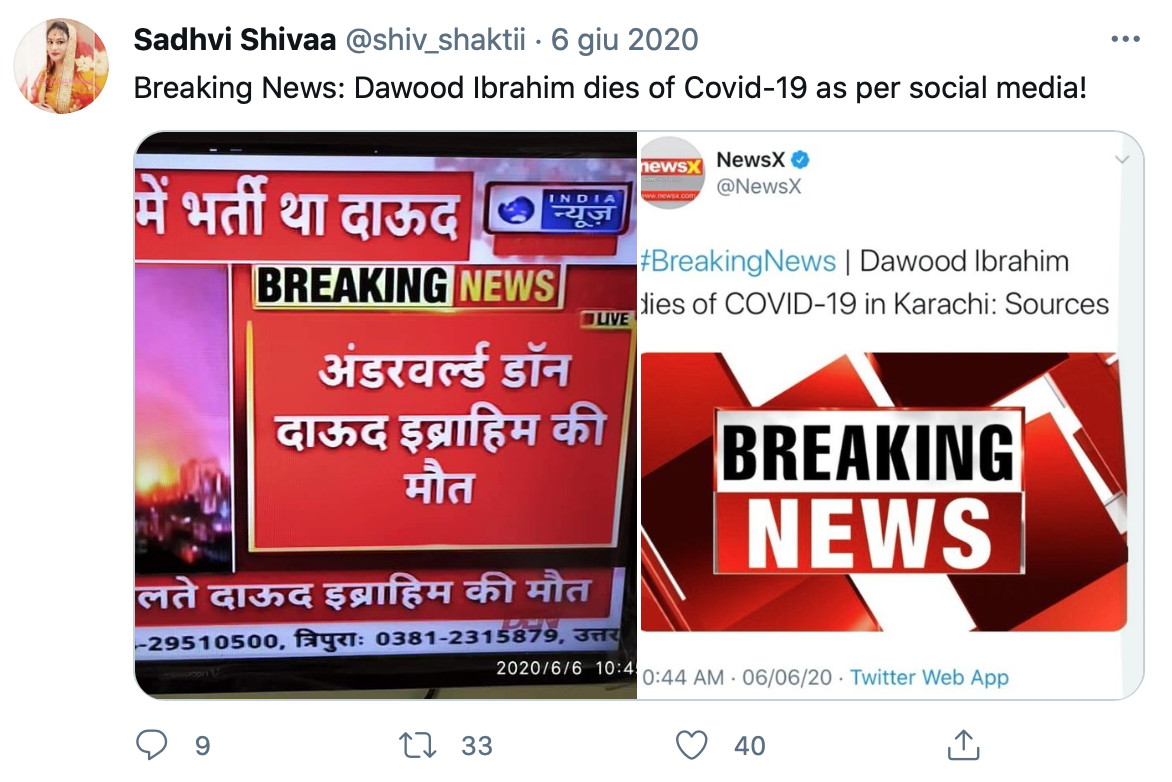

**Why is this tweet fake?** https://newsmeter.in/claim-that-dawood-ibrahim-died-of-covid-19-is-false/